### IMPORT ESSENTIAL

In [1]:
from Perception_UNDER_DEVELOPMENT.lane_detect import *
from IPython.display import clear_output
import time

### BOUNDARY POINT EXTRACTION & CLUSTERING

([695], [-405, 0])
[234199, 164, 149, 41, 0, 43, 480]


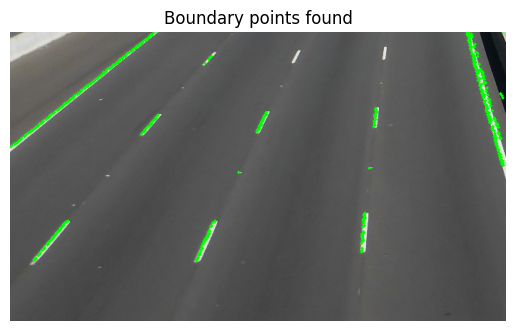

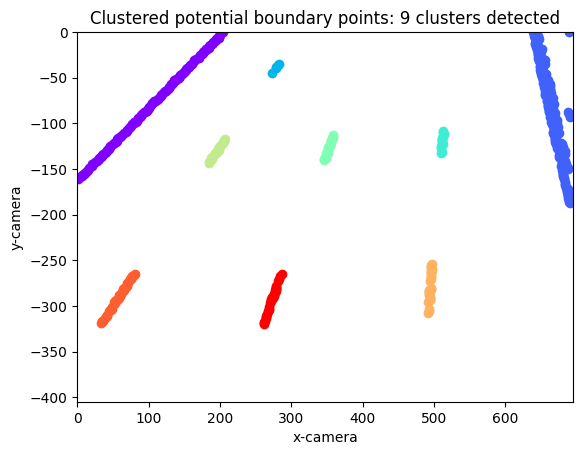

In [2]:
img_path = 'Perception_UNDER_DEVELOPMENT/test_imgs/test8.jpg'
default = {
    'img': img_path,
    'ascent_threshold': 50,
    'winning_percentage': 0.4,
    'ascent_to_plateau': 20,
    'min_pixels_to_plateau': 3,
    'lower_pixel_limit': 5,
    'upper_pixel_limit': 100,
    'confidence_interval': 0.08,
}
height, width, _ = cv2.imread(img_path).shape
shape = ([width], [-height, 0])
print(shape)

points, status = find_plateaus(**default)
print(status)
display_points(img_path, points)
plt.show()

deprojected = deproject_points(points, 22.5, 15, 2.75e-3, 1.3e-6, 2304, 1296)
labels = dbscan_cluster(deprojected, eps=0.3)
display_clusters(points, labels, dim=shape)
plt.show()
# for i in range(0, 90, 5):
#     clear_output(wait=True)
#     deprojected = deproject_points(points, 22.5, i, 2.75e-3, 1.3e-6, 2304, 1296)
#     # display_clusters(deprojected, labels, dim=([-100, 100], [-100, 100]))
#     first_lane, second_lane = find_lane_points(deprojected, labels)
#     display_clusters(first_lane + second_lane, [0] * len(first_lane) + [1] * len(second_lane), dim=([0, 50], [-50, 50]))
#     plt.show()

### ELIMINATE UNNECESSARY CLUSTERS

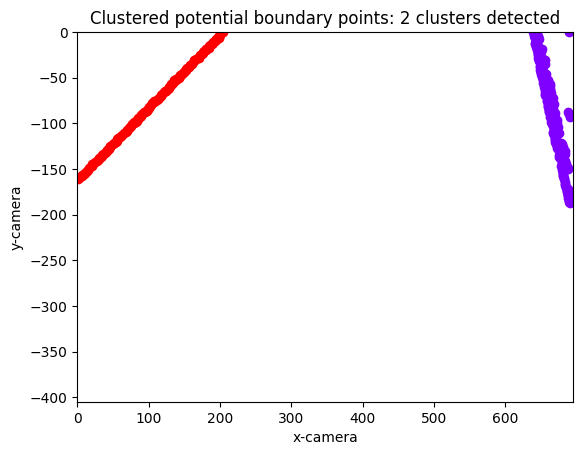

In [3]:
first_lane, second_lane = find_lane_points(points, labels)
display_clusters(first_lane + second_lane, [0] * len(first_lane) + [1] * len(second_lane), dim=shape)

### FIT LANES & SUGGEST PATH

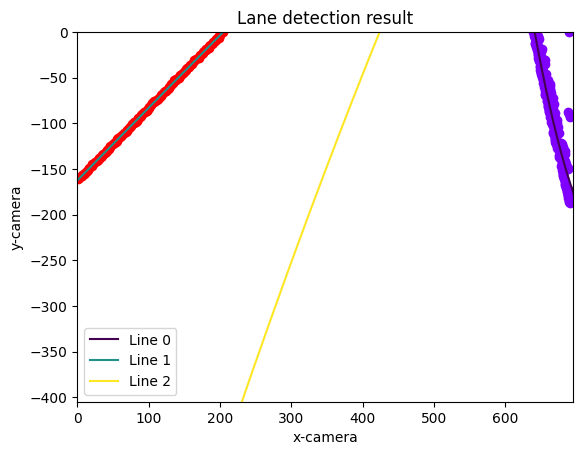

In [4]:
polys = [fit_polynomial(first_lane), fit_polynomial(second_lane), suggest_path(first_lane, second_lane)]
display_clusters(first_lane + second_lane, [0] * len(first_lane) + [1] * len(second_lane), dim=shape)
display_polynomials(polys, dim=shape, cmap='viridis')